In [1]:
%%time
import pandas as pd
from strategy import Strategy
from league import League
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

#df = None
#for f in [f for f in os.listdir("leagues") if '.csv' in f]:
#    print(f)
#    df = pd.concat([df, pd.read_csv(f"leagues/{f}")])

df = Strategy.load_dataset('db.csv')
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})

df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: League.cpt_winner(x[0], x[1]), axis=1)
#df.to_csv('db.csv')

Found file
CPU times: user 5.5 s, sys: 523 ms, total: 6.03 s
Wall time: 2.67 s


In [14]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
print('\n'.join(strategies))

NUMBER: 171
strategy_3M_H_GA_rank_1__H_P_rank_2__2.json
strategy_3M_H_GA_rank_1__H_P_rank_2__1.json
strategy_GA_rank_1__3M_G_rank_2__3.json
strategy_GA_rank_1__3M_G_rank_2__2.json
strategy_GA_rank_1__3M_G_rank_2__1.json
strategy_3M_H_G_coeff_rank_1__3M_G_rank_2__3.json
strategy_3M_H_G_coeff_rank_1__3M_G_rank_2__2.json
strategy_3M_H_G_coeff_rank_1__3M_G_rank_2__1.json
strategy_3M_H_G_rank_1__3M_A_P_rank_2__3.json
strategy_3M_H_G_rank_1__3M_A_P_rank_2__2.json
strategy_3M_H_G_rank_1__3M_A_P_rank_2__1.json
strategy_3M_H_GA_coeff_rank_1__GA_rank_2__3.json
strategy_3M_H_GA_coeff_rank_1__GA_rank_2__2.json
strategy_3M_H_GA_coeff_rank_1__GA_rank_2__1.json
strategy_3M_H_GA_coeff_rank_1__3M_A_GA_coeff_rank_2__3.json
strategy_3M_H_GA_coeff_rank_1__3M_A_GA_coeff_rank_2__2.json
strategy_3M_H_GA_coeff_rank_1__3M_A_GA_coeff_rank_2__1.json
strategy_H_P_rank_1__GA_rank_2__3.json
strategy_H_P_rank_1__GA_rank_2__2.json
strategy_H_P_rank_1__GA_rank_2__1.json
strategy_G_rank_1__3M_GA_rank_2__3.json
strategy

In [15]:
dic = {}
for s in strategies:
    strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
    matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
    print(s)
    print(strategy)
    result = strategy.get('result')
    matches = matches.reset_index(drop=True)
    strategy_stats = {}
    strategy_stats["strategy"] = strategy
    strategy_stats["n_matches"] = len(matches)
    strategy_stats["total_revenue"] = matches.gain.sum()
    strategy_stats["roi"] = matches.gain.sum() / len(matches) * 100
    strategy_stats["n_wins"] = len(matches[matches.result == result])
    strategy_stats["winning_rate"] = len(matches[matches.result == result]) / len(matches) * 100
    strategy_stats["avg_odd"] = matches[f'bet365_{result}'].mean()

    print(strategy_stats)
    print()
    dic[s] = strategy_stats

    #print(f'Number of matches: {len(matches)}')
    #print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
    #print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
    #print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
    #print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
    #print(f"Average odd: {matches[f'bet365_{result}'].mean()}")


strategy_3M_H_GA_rank_1__H_P_rank_2__2.json
{'3M_H_GA_rank_1': [22, 23], 'H_P_rank_2': [1, 12], 'result': 2}
{'strategy': {'3M_H_GA_rank_1': [22, 23], 'H_P_rank_2': [1, 12], 'result': 2}, 'n_matches': 610, 'total_revenue': 38.74000000000001, 'roi': 6.3508196721311485, 'n_wins': 198, 'winning_rate': 32.459016393442624, 'avg_odd': 3.3282295081967215}

strategy_3M_H_GA_rank_1__H_P_rank_2__1.json
{'3M_H_GA_rank_1': [23, 26], 'H_P_rank_2': [2, 8], 'result': 1}
{'strategy': {'3M_H_GA_rank_1': [23, 26], 'H_P_rank_2': [2, 8], 'result': 1}, 'n_matches': 290, 'total_revenue': 41.290000000000006, 'roi': 14.237931034482761, 'n_wins': 129, 'winning_rate': 44.48275862068966, 'avg_odd': 2.840827586206897}

strategy_GA_rank_1__3M_G_rank_2__3.json
{'GA_rank_1': [22, 28], '3M_G_rank_2': [3, 4], 'result': 3}
{'strategy': {'GA_rank_1': [22, 28], '3M_G_rank_2': [3, 4], 'result': 3}, 'n_matches': 258, 'total_revenue': 35.790000000000006, 'roi': 13.872093023255816, 'n_wins': 114, 'winning_rate': 44.186046511

strategy_3M_H_GA_coeff_rank_1__3M_P_coeff_rank_2__2.json
{'3M_H_GA_coeff_rank_1': [11, 13], '3M_P_coeff_rank_2': [19, 21], 'result': 2}
{'strategy': {'3M_H_GA_coeff_rank_1': [11, 13], '3M_P_coeff_rank_2': [19, 21], 'result': 2}, 'n_matches': 1004, 'total_revenue': 82.76, 'roi': 8.243027888446216, 'n_wins': 310, 'winning_rate': 30.87649402390438, 'avg_odd': 3.644800796812749}

strategy_3M_H_GA_coeff_rank_1__3M_P_coeff_rank_2__1.json
{'3M_H_GA_coeff_rank_1': [21, 21], '3M_P_coeff_rank_2': [6, 28], 'result': 1}
{'strategy': {'3M_H_GA_coeff_rank_1': [21, 21], '3M_P_coeff_rank_2': [6, 28], 'result': 1}, 'n_matches': 878, 'total_revenue': 29.490000000000002, 'roi': 3.35876993166287, 'n_wins': 395, 'winning_rate': 44.98861047835991, 'avg_odd': 2.5059567198177675}

strategy_H_P_rank_1__3M_A_P_coeff_rank_2__3.json
{'H_P_rank_1': [21, 24], '3M_A_P_coeff_rank_2': [16, 19], 'result': 3}
{'strategy': {'H_P_rank_1': [21, 24], '3M_A_P_coeff_rank_2': [16, 19], 'result': 3}, 'n_matches': 683, 'total_re

strategy_H_GA_rank_1__P_rank_2__3.json
{'H_GA_rank_1': [13, 24], 'P_rank_2': [5, 11], 'result': 3, 'bet365_3': [6.13, 10.11]}
{'strategy': {'H_GA_rank_1': [13, 24], 'P_rank_2': [5, 11], 'result': 3, 'bet365_3': [6.13, 10.11]}, 'n_matches': 418, 'total_revenue': 108.0, 'roi': 25.837320574162682, 'n_wins': 71, 'winning_rate': 16.985645933014354, 'avg_odd': 7.56877990430622}

strategy_H_GA_rank_1__P_rank_2__2.json
{'H_GA_rank_1': [18, 22], 'P_rank_2': [17, 26], 'result': 2, 'bet365_2': [4.9399999999999995, 5.630000000000001]}
{'strategy': {'H_GA_rank_1': [18, 22], 'P_rank_2': [17, 26], 'result': 2, 'bet365_2': [4.9399999999999995, 5.630000000000001]}, 'n_matches': 32, 'total_revenue': 31.1, 'roi': 97.1875, 'n_wins': 12, 'winning_rate': 37.5, 'avg_odd': 5.209375}

strategy_H_GA_rank_1__P_rank_2__1.json
{'H_GA_rank_1': [11, 24], 'P_rank_2': [1, 11], 'result': 1, 'bet365_1': [4.28, 8.67]}
{'strategy': {'H_GA_rank_1': [11, 24], 'P_rank_2': [1, 11], 'result': 1, 'bet365_1': [4.28, 8.67]}, 'n_m

strategy_A_GA_rank_1__A_P_rank_2__3.json
{'A_GA_rank_1': [4, 18], 'A_P_rank_2': [10, 26], 'result': 3, 'bet365_3': [7.890000000000001, 9.86]}
{'strategy': {'A_GA_rank_1': [4, 18], 'A_P_rank_2': [10, 26], 'result': 3, 'bet365_3': [7.890000000000001, 9.86]}, 'n_matches': 2643, 'total_revenue': 276.5, 'roi': 10.461596670450247, 'n_wins': 340, 'winning_rate': 12.864169504351116, 'avg_odd': 8.591184260310254}

strategy_A_GA_rank_1__A_P_rank_2__2.json
{'A_GA_rank_1': [18, 27], 'A_P_rank_2': [4, 28], 'result': 2, 'bet365_2': [7.16, 8.97]}
{'strategy': {'A_GA_rank_1': [18, 27], 'A_P_rank_2': [4, 28], 'result': 2, 'bet365_2': [7.16, 8.97]}, 'n_matches': 18, 'total_revenue': 29.5, 'roi': 163.88888888888889, 'n_wins': 6, 'winning_rate': 33.33333333333333, 'avg_odd': 7.805555555555555}

strategy_A_GA_rank_1__A_P_rank_2__1.json
{'A_GA_rank_1': [15, 26], 'A_P_rank_2': [2, 16], 'result': 1, 'bet365_1': [4.59, 9.82]}
{'strategy': {'A_GA_rank_1': [15, 26], 'A_P_rank_2': [2, 16], 'result': 1, 'bet365_1'

strategy_3M_H_GA_rank_1__3M_GA_rank_2__2.json
{'3M_H_GA_rank_1': [4, 9], '3M_GA_rank_2': [12, 25], 'result': 2, 'bet365_2': [2.27, 3.1]}
{'strategy': {'3M_H_GA_rank_1': [4, 9], '3M_GA_rank_2': [12, 25], 'result': 2, 'bet365_2': [2.27, 3.1]}, 'n_matches': 2239, 'total_revenue': 100.12, 'roi': 4.471639124609201, 'n_wins': 774, 'winning_rate': 34.56900401965163, 'avg_odd': 3.02447967842787}

strategy_3M_H_GA_rank_1__3M_GA_rank_2__1.json
{'3M_H_GA_rank_1': [14, 17], '3M_GA_rank_2': [16, 21], 'result': 1, 'bet365_1': [2.08, 10.65]}
{'strategy': {'3M_H_GA_rank_1': [14, 17], '3M_GA_rank_2': [16, 21], 'result': 1, 'bet365_1': [2.08, 10.65]}, 'n_matches': 1423, 'total_revenue': 70.97, 'roi': 4.987350667603654, 'n_wins': 569, 'winning_rate': 39.98594518622628, 'avg_odd': 2.7995221363316936}

strategy_3M_G_rank_1__A_P_rank_2__3.json
{'3M_G_rank_1': [18, 20], 'A_P_rank_2': [13, 26], 'result': 3, 'bet365_3': [6.86, 10.44]}
{'strategy': {'3M_G_rank_1': [18, 20], 'A_P_rank_2': [13, 26], 'result': 3, 

strategy_P_rank_1__H_P_rank_2__2.json
{'P_rank_1': [5, 13], 'H_P_rank_2': [16, 21], 'result': 2, 'bet365_2': [6.68, 9.85]}
{'strategy': {'P_rank_1': [5, 13], 'H_P_rank_2': [16, 21], 'result': 2, 'bet365_2': [6.68, 9.85]}, 'n_matches': 143, 'total_revenue': 54.0, 'roi': 37.76223776223776, 'n_wins': 26, 'winning_rate': 18.181818181818183, 'avg_odd': 7.646853146853147}

strategy_P_rank_1__H_P_rank_2__1.json
{'P_rank_1': [4, 26], 'H_P_rank_2': [4, 27], 'result': 1, 'bet365_1': [4.6, 9.5]}
{'strategy': {'P_rank_1': [4, 26], 'H_P_rank_2': [4, 27], 'result': 1, 'bet365_1': [4.6, 9.5]}, 'n_matches': 3785, 'total_revenue': 363.65000000000003, 'roi': 9.60766182298547, 'n_wins': 718, 'winning_rate': 18.969616908850725, 'avg_odd': 5.961173051519155}

strategy_P_rank_1__H_G_rank_2__3.json
{'P_rank_1': [12, 26], 'H_G_rank_2': [5, 13], 'result': 3, 'bet365_3': [5.609999999999999, 7.2700000000000005]}
{'strategy': {'P_rank_1': [12, 26], 'H_G_rank_2': [5, 13], 'result': 3, 'bet365_3': [5.60999999999999

strategy_P_rank_1__A_GA_rank_2__1.json
{'P_rank_1': [5, 12], 'A_GA_rank_2': [4, 16], 'result': 1, 'bet365_1': [4.23, 7.38]}
{'strategy': {'P_rank_1': [5, 12], 'A_GA_rank_2': [4, 16], 'result': 1, 'bet365_1': [4.23, 7.38]}, 'n_matches': 1827, 'total_revenue': 191.77999999999997, 'roi': 10.496989600437875, 'n_wins': 392, 'winning_rate': 21.455938697318008, 'avg_odd': 5.232123700054735}

strategy_P_rank_1__3M_P_rank_2__3.json
{'P_rank_1': [4, 11], '3M_P_rank_2': [9, 23], 'result': 3, 'bet365_3': [7.74, 8.62]}
{'strategy': {'P_rank_1': [4, 11], '3M_P_rank_2': [9, 23], 'result': 3, 'bet365_3': [7.74, 8.62]}, 'n_matches': 1275, 'total_revenue': 253.5, 'roi': 19.88235294117647, 'n_wins': 186, 'winning_rate': 14.588235294117647, 'avg_odd': 8.215686274509803}

strategy_P_rank_1__3M_P_rank_2__2.json
{'P_rank_1': [11, 14], '3M_P_rank_2': [6, 21], 'result': 2, 'bet365_2': [6.6899999999999995, 8.98]}
{'strategy': {'P_rank_1': [11, 14], '3M_P_rank_2': [6, 21], 'result': 2, 'bet365_2': [6.68999999999

{'strategy': {'H_P_rank_1': [12, 28], 'A_P_rank_2': [3, 16], 'result': 1, 'bet365_1': [4.2, 6.28]}, 'n_matches': 3471, 'total_revenue': 153.64, 'roi': 4.426390089311437, 'n_wins': 745, 'winning_rate': 21.46355517142034, 'avg_odd': 4.905998271391529}

strategy_H_G_rank_1__A_GA_rank_2__3.json
{'H_G_rank_1': [22, 27], 'A_GA_rank_2': [2, 26], 'result': 3, 'bet365_3': [2.0700000000000003, 4.59]}
{'strategy': {'H_G_rank_1': [22, 27], 'A_GA_rank_2': [2, 26], 'result': 3, 'bet365_3': [2.0700000000000003, 4.59]}, 'n_matches': 1687, 'total_revenue': -28.11, 'roi': -1.6662714878482514, 'n_wins': 559, 'winning_rate': 33.13574392412566, 'avg_odd': 3.11602252519265}

strategy_H_G_rank_1__A_GA_rank_2__2.json
{'H_G_rank_1': [5, 6], 'A_GA_rank_2': [14, 26], 'result': 2, 'bet365_2': [5.210000000000001, 7.37]}
{'strategy': {'H_G_rank_1': [5, 6], 'A_GA_rank_2': [14, 26], 'result': 2, 'bet365_2': [5.210000000000001, 7.37]}, 'n_matches': 266, 'total_revenue': 48.75, 'roi': 18.327067669172934, 'n_wins': 53, 

In [32]:
dic = dict(sorted(dic.items(), key=lambda item: - item[1]["total_revenue"]))
for k, v in dic.items():
    print(k)
    print(dic[k])
    print()


strategy_H_GA_rank_1__GA_rank_2__1.json
{'strategy': {'H_GA_rank_1': [11, 25], 'GA_rank_2': [1, 8], 'result': 1, 'bet365_1': [4.300000000000001, 8.71]}, 'n_matches': 3717, 'total_revenue': 475.31999999999994, 'roi': 12.78773204196933, 'n_wins': 757, 'winning_rate': 20.365886467581383, 'avg_odd': 5.719510357815442}

strategy_A_G_rank_1__A_P_rank_2__1.json
{'strategy': {'A_G_rank_1': [9, 22], 'A_P_rank_2': [4, 16], 'result': 1, 'bet365_1': [4.3100000000000005, 6.58]}, 'n_matches': 2954, 'total_revenue': 408.37, 'roi': 13.824306025727825, 'n_wins': 664, 'winning_rate': 22.47799593771158, 'avg_odd': 5.130423155044008}

strategy_H_GA_rank_1__3M_A_G_rank_2__1.json
{'strategy': {'H_GA_rank_1': [11, 25], '3M_A_G_rank_2': [1, 15], 'result': 1, 'bet365_1': [4.5600000000000005, 8.8]}, 'n_matches': 3405, 'total_revenue': 405.13, 'roi': 11.898091042584435, 'n_wins': 654, 'winning_rate': 19.20704845814978, 'avg_odd': 6.010032305433186}

strategy_P_rank_1__3M_GA_rank_2__1.json
{'strategy': {'P_rank_1

In [35]:
STRATEGY = 'strategy_P_rank_1__GA_rank_2__3.json'

In [37]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'P_rank_1': [3, 11],
 'GA_rank_2': [4, 13],
 'result': 3,
 'bet365_3': [7.960000000000001, 9.709999999999999]}

In [38]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index(drop=True)
for key, value in dic[STRATEGY].items():
    print(key, ' : ', value)

strategy  :  {'P_rank_1': [3, 11], 'GA_rank_2': [4, 13], 'result': 3, 'bet365_3': [7.960000000000001, 9.709999999999999]}
n_matches  :  2089
total_revenue  :  370.5
roi  :  17.735758736237432
n_wins  :  287
winning_rate  :  13.738630923887026
avg_odd  :  8.597893729056965


In [39]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
8.0    696
8.5    564
9.0    553
9.5    276
Name: bet365_3, dtype: int64


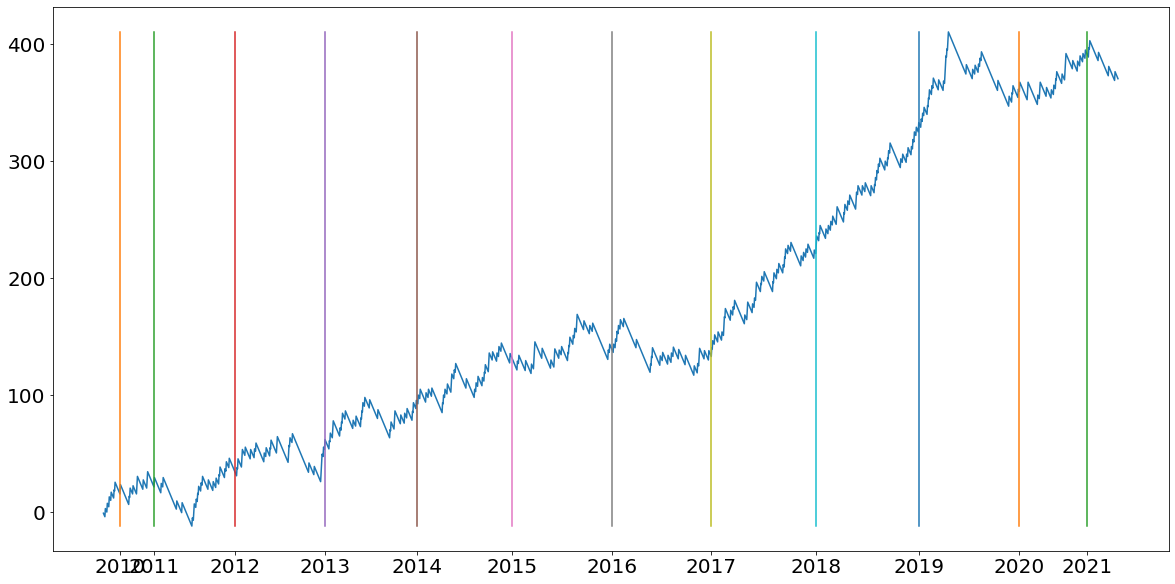

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 20})
matches.cum_gain.plot()
index = []
label = []
for i in range(2010, 2022):
    x = matches[matches.date >= str(i)].index[0]
    plt.plot([x, x], [matches.cum_gain.min(), matches.cum_gain.max()])
    index.append(x),
    label.append(str(i))
xticks = plt.xticks(index, label)

<AxesSubplot:xlabel='year'>

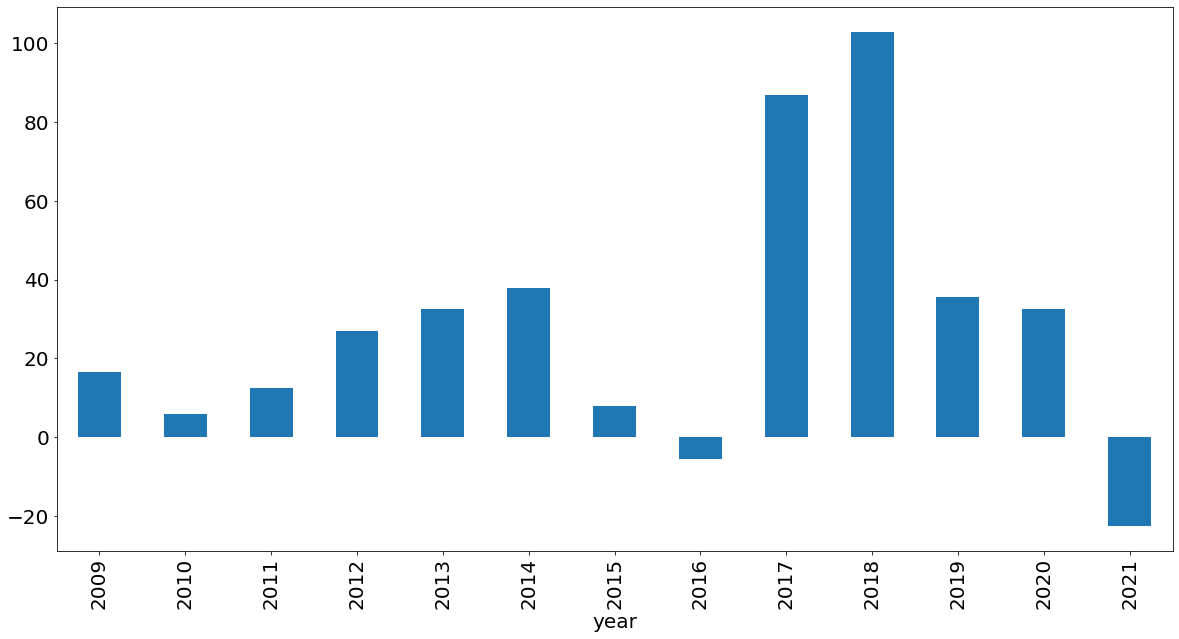

In [42]:
gain_by_year.plot.bar()

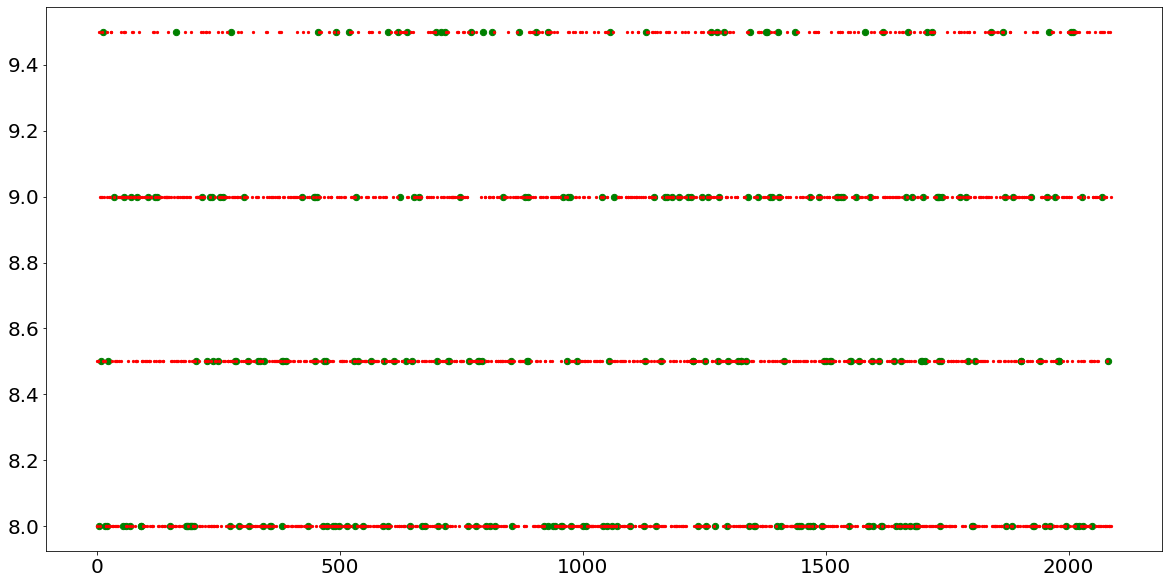

In [43]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

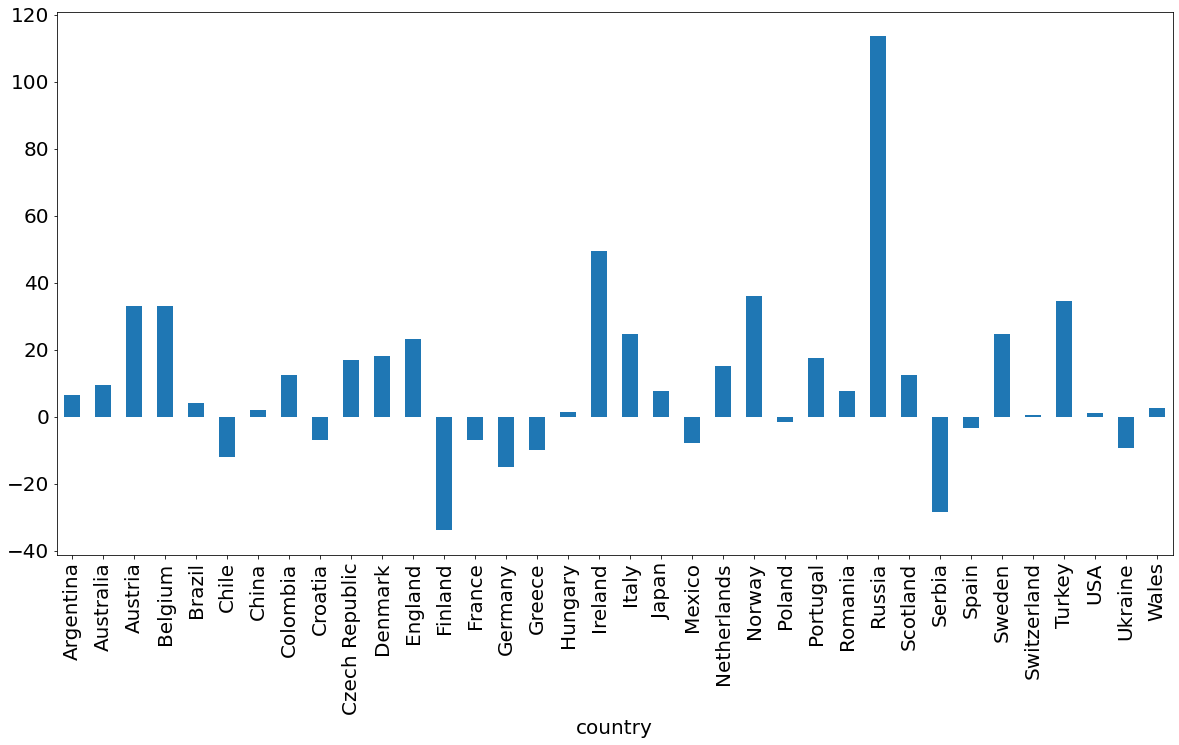

In [44]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

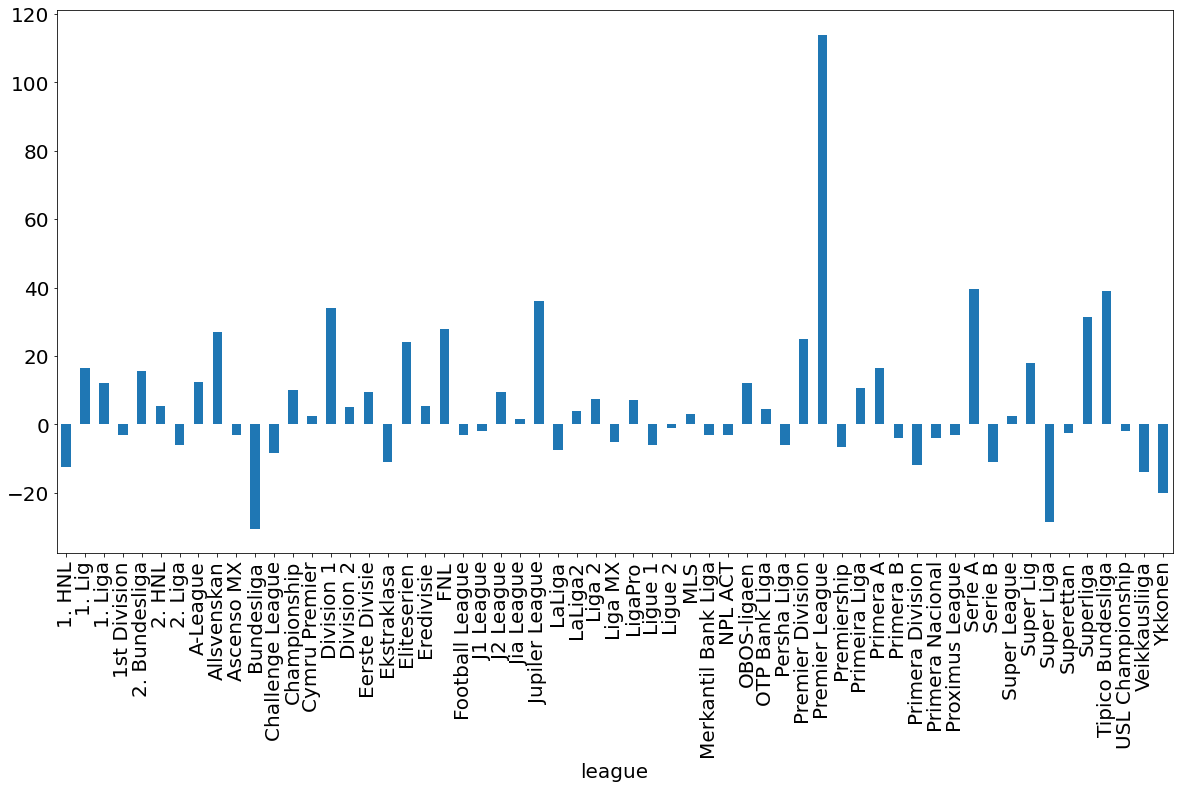

In [45]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()